# Topic Modeling Frank Ocean Lyrics

The goal in this notebook is to
1. Use TF-IDF and NMF to Topic Model the Album
2. Use Cosine Similarity to see which songs are similar

In [1]:
import pandas as pd

df = pd.read_csv('Frank_Lyrics.csv')
df.head()

,track,album,lyrics
0,Strawberry Swing,"Nostalgia, Ultra",when we were kids we handpainted strawberries...
1,Novacane,"Nostalgia, Ultra",i think i started somethin i got what i wante...
2,We All Try,"Nostalgia, Ultra",i believe jehovah jireh i believe theres heav...
3,Bitches Talkin' (Metal Gear Solid),"Nostalgia, Ultra",stop let me go you dont got no jodeci all you...
4,Songs For Women,"Nostalgia, Ultra",when i was younger i used to wonder like if i...


## Analyzing 'Blonde' (1 Album)

### Vectorizing the Text with TF-IDF

TF-IDF is the optimal choice here because it considers the frequency of a word or phrase with respect to both the individual document/song and the entire corpus


In [2]:
# TFIDF > Count Vect because I wanted the code to consider the frequency of word use
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.tokenize import TreebankWordTokenizer
from nltk.stem import PorterStemmer

class nlp_pipe:
    
    def __init__(self, vectorizer, tokenizer, stemmer):
        self.tokenizer = tokenizer # groups words
        self.stemmer = stemmer #simplifies words
        self.vectorizer = vectorizer #counts words
    
    def fit_transform(self, df):
        documents = df.copy()
        for idx, document in enumerate(documents):
            documents[idx] = self._tok_stem(document)
        doc_vect = self.vectorizer.fit_transform(documents)
        return doc_vect, self.vectorizer.get_feature_names()
    
    # internal -- tokenizes and stems words in a string
    def _tok_stem(self, text_to_fit_on):
        tokenized_text = self.tokenizer.tokenize(text_to_fit_on)
        stemmed_list = [self.stemmer.stem(word) for word in tokenized_text]
        return ' '.join(stemmed_list)

In [3]:
nlp = nlp_pipe(TfidfVectorizer(stop_words='english'),
               TreebankWordTokenizer(), PorterStemmer())

X = df[df['album'] == 'Blonde'].reset_index()['lyrics']

doc_spars, terms = nlp.fit_transform(X)

In [4]:
doc_term = pd.DataFrame(doc_spars.toarray(), columns=terms)
doc_term

,16,180,1998,20,2009,24,28th,2pac,400,600,...,yea,yeah,year,yellow,yo,youd,youll,younger,youv,zip
0,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.059643,0.000000,0.000000
1,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.053319,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.229265,0.000000,0.065833,0.000000,0.150789,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.027868,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.066517,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.032448,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.096944,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,0.000000,0.000000,0.03197,0.000000,0.000000,0.000000,0.03197,0.000000,0.000000,0.000000,...,0.000000,0.038887,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
9,0.000000,0.000000,0.00000,0.076228,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.076228,0.000000,0.050035,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


### Topic Modeling with NMF

In [5]:
# NMF > LSA because NMF considers combination of words rather than individual variance/frequency
from sklearn.decomposition import NMF

In [6]:
comps = 3
nmf = NMF(n_components=comps)
doc_topic_arr = nmf.fit_transform(doc_spars)

In [7]:
index_ls = [f"component_{x+1}" for x in range(comps)]
topic_word = pd.DataFrame(nmf.components_.round(3),
             index = index_ls,
             columns = terms)
topic_word

,16,180,1998,20,2009,24,28th,2pac,400,600,...,yea,yeah,year,yellow,yo,youd,youll,younger,youv,zip
component_1,0.00,0.013,0.012,0.000,0.013,0.013,0.012,0.027,0.013,0.013,...,0.000,0.067,0.046,0.000,0.027,0.000,0.000,0.022,0.013,0.013
component_2,0.00,0.000,0.000,0.046,0.000,0.000,0.000,0.001,0.000,0.000,...,0.046,0.004,0.028,0.019,0.001,0.003,0.000,0.000,0.000,0.000
component_3,0.03,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.084,0.051,0.022,0.000,0.053,0.038,0.000,0.000,0.000


In [8]:
def display_topics(model, feature_names, no_top_words, topic_names=None):
    for ix, topic in enumerate(model.components_):
        if not topic_names or not topic_names[ix]:
            print("\nTopic ", ix)
        else:
            print(f"\nTopic {ix+1}: '",topic_names[ix],"'")
        print(", ".join([feature_names[i]
                        for i in topic.argsort()[:-no_top_words - 1:-1]]))

In [45]:
topics = ["GruntWork/FightBack",
          "ImAmateur/Hopeless",
          "Escapism/Potential"]

display_topics(nmf, terms, 10, topic_names=topics)


Topic 1: ' GruntWork/FightBack '
night, dont, nigga, shit, fuck, know, like, got, bitch, wa

Topic 2: ' ImAmateur/Hopeless '
solo, oh, im, inhal, hard, skirt, kid, aye, cut, real

Topic 3: ' Escapism/Potential '
life, dream, thi, way, id, love, mind, close, anyth, ahhah


In [18]:
doc_topic = pd.DataFrame(doc_topic_arr.round(5))
doc_topic

,0,1,2
0,0.41413,0.00000,0.03847
1,0.11682,0.00000,0.34735
2,0.00000,0.05112,0.53659
3,0.19082,0.00000,0.00000
4,0.00000,0.82254,0.00000
5,0.11988,0.00000,0.31259
6,0.34688,0.02662,0.00000
7,0.53006,0.00000,0.00000
8,0.42038,0.00950,0.00000
9,0.02551,0.80237,0.04654


### KMeans Clustering to Group Similar Documents 

In [26]:
# min max > standard because 0-1 is better to interpret (percents)
from sklearn.preprocessing import MinMaxScaler 

#KMeans > DBScan because I dont want to exclude points (outliers).
# KMeans > HAC because kmeans offers better analysis after fitTransform
from sklearn.cluster import KMeans 

from collections import defaultdict

In [46]:
n_groups = 4
blonde_tracks = df[df['album'] == 'Blonde'].reset_index()['track']


#Scale
scaled_doc_top = MinMaxScaler().fit_transform(doc_topic)


# KMeans km
km = KMeans(n_clusters=n_groups, random_state=100)

km.fit(scaled_doc_top)


#clustering actual track names using km.labels_
track_clust = defaultdict(list)

for idx, group in enumerate(km.labels_):
    track_clust[group].append(blonde_tracks[idx])


#Description of each Cluster using km.cluster_centers_
clust_description = {}

for idx, spread in enumerate(km.cluster_centers_):
    total = sum(spread)
    
    description = ''
    for i, part in enumerate(spread):
        if part:
            description += f"'{topics[i]}' {(100*(part/total)).round(2)}% - "

    clust_description[idx] = description
    
    
# Printing the tracks under each description
for idx in clust_description:
    print(clust_description[idx])
    print(track_clust[idx])
    print('\n')

'GruntWork/FightBack' 94.61% - 'ImAmateur/Hopeless' 1.73% - 'Escapism/Potential' 3.66% - 
['Nikes', 'Be Yourself', 'Self Control', 'Good Guy', 'Nights', 'Facebook Story', 'Futura Free']


'GruntWork/FightBack' 27.39% - 'Escapism/Potential' 72.61% - 
['Ivy', 'Skyline To', 'Pretty Sweet']


'GruntWork/FightBack' 2.28% - 'ImAmateur/Hopeless' 93.7% - 'Escapism/Potential' 4.02% - 
['Solo', 'Solo (Reprise)']


'ImAmateur/Hopeless' 1.37% - 'Escapism/Potential' 98.63% - 
['Pink + White', 'Close To You', 'White Ferrari', 'Seigfried', 'Godspeed']




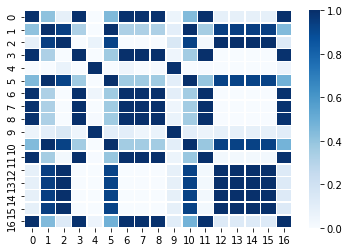

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns

# plt.imshow(, cmap='hot', interpolation='nearest')
# plt.show()

ax = sns.heatmap(cosine_similarity(scaled_doc_top), linewidth=0.5, cmap='Blues')
plt.show()

##  Entire Discography

### Vectorizing (TFIDF)

In [48]:
nlp = nlp_pipe(TfidfVectorizer(stop_words='english'),
               TreebankWordTokenizer(), PorterStemmer())

doc_spars, terms = nlp.fit_transform(df['lyrics'])

In [49]:
doc_term = pd.DataFrame(doc_spars.toarray(), columns=terms)
doc_term.head()

,000,10,10k,11,12,1207,143,15,16,180,...,youd,youll,young,younger,youv,yup,zero,zip,zone,zs
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.028394,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.000000,0.032563,0.0,0.000000,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.028004,0.0,0.0,0.036262,0.000000,0.0,0.000000,0.0,0.0,0.0


### Topic Modeling (NMF)

In [58]:
comps = 9
nmf = NMF(n_components=comps)
doc_topic_arr = nmf.fit_transform(doc_spars)

index_ls = [f"component_{x+1}" for x in range(comps)]
topic_word = pd.DataFrame(nmf.components_.round(3),
             index = index_ls,
             columns = terms)
topic_word

,000,10,10k,11,12,1207,143,15,16,180,...,youd,youll,young,younger,youv,yup,zero,zip,zone,zs
component_1,0.000,0.000,0.000,0.000,0.000,0.001,0.000,0.001,0.000,0.014,...,0.008,0.072,0.000,0.020,0.010,0.040,0.000,0.014,0.003,0.000
component_2,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.013,0.000,0.000,...,0.010,0.000,0.000,0.008,0.000,0.017,0.009,0.000,0.000,0.007
component_3,0.000,0.002,0.000,0.001,0.001,0.001,0.000,0.006,0.000,0.000,...,0.000,0.047,0.000,0.000,0.007,0.000,0.000,0.000,0.000,0.000
component_4,0.055,0.000,0.000,0.000,0.000,0.002,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
component_5,0.000,0.000,0.000,0.000,0.000,0.000,0.038,0.000,0.000,0.000,...,0.038,0.188,0.000,0.003,0.024,0.000,0.003,0.000,0.000,0.002
component_6,0.000,0.000,0.010,0.000,0.000,0.002,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.035,0.000,0.000,0.000,0.008,0.000
component_7,0.000,0.257,0.000,0.093,0.093,0.000,0.000,0.004,0.000,0.000,...,0.002,0.000,0.005,0.000,0.004,0.000,0.000,0.000,0.003,0.000
component_8,0.000,0.000,0.003,0.000,0.000,0.000,0.000,0.000,0.022,0.000,...,0.048,0.000,0.071,0.000,0.057,0.000,0.000,0.000,0.002,0.014
component_9,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.003,0.000,0.000,0.000,0.000,0.003,0.000,0.000,0.000,0.000


In [59]:
topics2 = ["Panic",
          "NaiveLover",
          "HustleToProve",
          "RunAway",
          "JumpIn!",
          "ImItImReady",
          "GottaFindIt",
          "AllGood",
          "SoloAmateur"]

display_topics(nmf, terms, 10, topic_names=topics2)


Topic 1: ' Panic '
noth, dream, nigga, dont, know, fuck, like, da, wa, say

Topic 2: ' NaiveLover '
love, sucker, na, babi, oh, make, denim, feel, like, ya

Topic 3: ' HustleToProve '
night, fight, everi, die, prove, got, club, love, battl, becaus

Topic 4: ' RunAway '
fli, hide, dont, everybodi, na, tri, wan, know, wing, secret

Topic 5: ' JumpIn! '
look, ohhh, embarrass, youll, twin, took, good, wa, like, come

Topic 6: ' ImItImReady '
im, babi, got, ohh, yeah, gon, bit, readi, na, littl

Topic 7: ' GottaFindIt '
somewher, run, tri, someth, 10, wait, morn, yard, thisll, suburbia

Topic 8: ' AllGood '
life, sweet, way, thi, say, certain, stream, time, best, let

Topic 9: ' SoloAmateur '
solo, oh, inhal, kid, skirt, citi, aye, real, cut, im


In [61]:
doc_topic = pd.DataFrame(doc_topic_arr.round(5),
             columns = None)
doc_topic.head()

,0,1,2,3,4,5,6,7,8
0,0.05262,0.16416,0.08164,0.00000,0.02036,0.00000,0.00000,0.07733,0.00485
1,0.06742,0.09526,0.00000,0.00000,0.00000,0.02350,0.00000,0.00000,0.00049
2,0.00000,0.00065,0.00203,0.15103,0.00000,0.00336,0.27582,0.00000,0.00000
3,0.11373,0.00000,0.00218,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
4,0.18503,0.00000,0.00000,0.01844,0.00028,0.00000,0.00000,0.00000,0.00000


In [62]:
nmf.reconstruction_err_

10.080282756653649

### Clustering (KMeans)

In [167]:
n_groups = 5
all_tracks = df['track']


#Scale
scaled_doc_top = MinMaxScaler().fit_transform(doc_topic)


# KMeans km
km = KMeans(n_clusters=n_groups, random_state=100)

km.fit(scaled_doc_top)


#clustering actual track names using km.labels_
track_clust = defaultdict(list)

for idx, group in enumerate(km.labels_):
    track_clust[group].append(all_tracks[idx])


#Description of each Cluster using km.cluster_centers_
clust_description = {}

for idx, spread in enumerate(km.cluster_centers_):
    total = sum(spread)
    
    description = ''
    for i, part in enumerate(spread):
        if part:
            description += f"'{topics2[i]}' {(100*(part/total)).round(2)}% - "

    clust_description[idx] = description
    
    
# Printing the tracks under each description
for idx in clust_description:
    print(clust_description[idx])
    print(track_clust[idx])
    print('\n')

'Panic' 71.81% - 'NaiveLover' 7.07% - 'HustleToProve' 3.55% - 'RunAway' 2.73% - 'JumpIn!' 4.28% - 'ImItImReady' 5.94% - 'GottaFindIt' 1.15% - 'AllGood' 2.49% - 'SoloAmateur' 0.99% - 
["Bitches Talkin' (Metal Gear Solid)", 'Songs For Women', 'There Will Be Tears', 'American Wedding', 'Know Better', 'Real', 'Richest Man In The Room', 'So Fresh', 'Stay If You Go', 'Not Just Money', 'Super Rich Kids', 'Alabama', 'U-N-I-T-Y', 'Slide On Me', 'Higgs', 'Nikes', 'Ivy', 'Self Control', 'Good Guy', 'Facebook Story', 'Seigfried', 'Futura Free']


'Panic' 4.41% - 'NaiveLover' 71.79% - 'HustleToProve' 3.46% - 'RunAway' 1.6% - 'JumpIn!' 3.74% - 'ImItImReady' 7.41% - 'GottaFindIt' 2.03% - 'AllGood' 4.08% - 'SoloAmateur' 1.49% - 
['Strawberry Swing', 'Lovecrimes', 'Broken Pieces', 'Denim', 'Greedy Love', 'I Need Love', "If I'm In Love", 'Lights', 'Love On My Piano', 'No Love', 'Non-Stop', 'Ohh In Love', 'Open Air', 'Quickly', 'Rocket Love', 'Simply', 'Sucka For Love', 'Sucker For Love', 'Lost', 'Bad Re

## Conclusisons - Visualizations

- Looking at Topics over time / albums

In [77]:
new_df = pd.concat([df, doc_topic], axis=1)

new_df.head()

,track,album,lyrics,0,1,2,3,4,5,6,7,8
0,Strawberry Swing,"Nostalgia, Ultra",when we were kids we handpainted strawberries...,0.05262,0.16416,0.08164,0.00000,0.02036,0.00000,0.00000,0.07733,0.00485
1,Novacane,"Nostalgia, Ultra",i think i started somethin i got what i wante...,0.06742,0.09526,0.00000,0.00000,0.00000,0.02350,0.00000,0.00000,0.00049
2,We All Try,"Nostalgia, Ultra",i believe jehovah jireh i believe theres heav...,0.00000,0.00065,0.00203,0.15103,0.00000,0.00336,0.27582,0.00000,0.00000
3,Bitches Talkin' (Metal Gear Solid),"Nostalgia, Ultra",stop let me go you dont got no jodeci all you...,0.11373,0.00000,0.00218,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
4,Songs For Women,"Nostalgia, Ultra",when i was younger i used to wonder like if i...,0.18503,0.00000,0.00000,0.01844,0.00028,0.00000,0.00000,0.00000,0.00000


In [101]:
topic_avgs = new_df.groupby('album').mean()

old_names = [col for col in topic_avgs.columns]
new_names = [topic for topic in topics2]
names = {}
for old, new in zip(old_names, new_names):
    names[old] = new
    
topic_avgs.rename(columns=names, inplace=True)

topic_avgs = topic_avgs.loc[df.album.unique()].reset_index()

topic_avgs

,album,Panic,NaiveLover,HustleToProve,RunAway,JumpIn!,ImItImReady,GottaFindIt,AllGood,SoloAmateur
0,"Nostalgia, Ultra",0.084587,0.060635,0.008578,0.021447,0.006144,0.022932,0.039699,0.010797,0.001428
1,The Lonny Breaux Collection,0.029796,0.094322,0.041580,0.054233,0.053118,0.114589,0.011390,0.031520,0.009154
2,Channel Orange,0.046914,0.049448,0.004494,0.017293,0.041988,0.024391,0.033898,0.051269,0.010515
3,Endless,0.057738,0.037304,0.010306,0.012083,0.024518,0.027315,0.100844,0.092795,0.008458
4,Blonde,0.099166,0.015243,0.049565,0.014903,0.038023,0.017356,0.028194,0.081672,0.114859


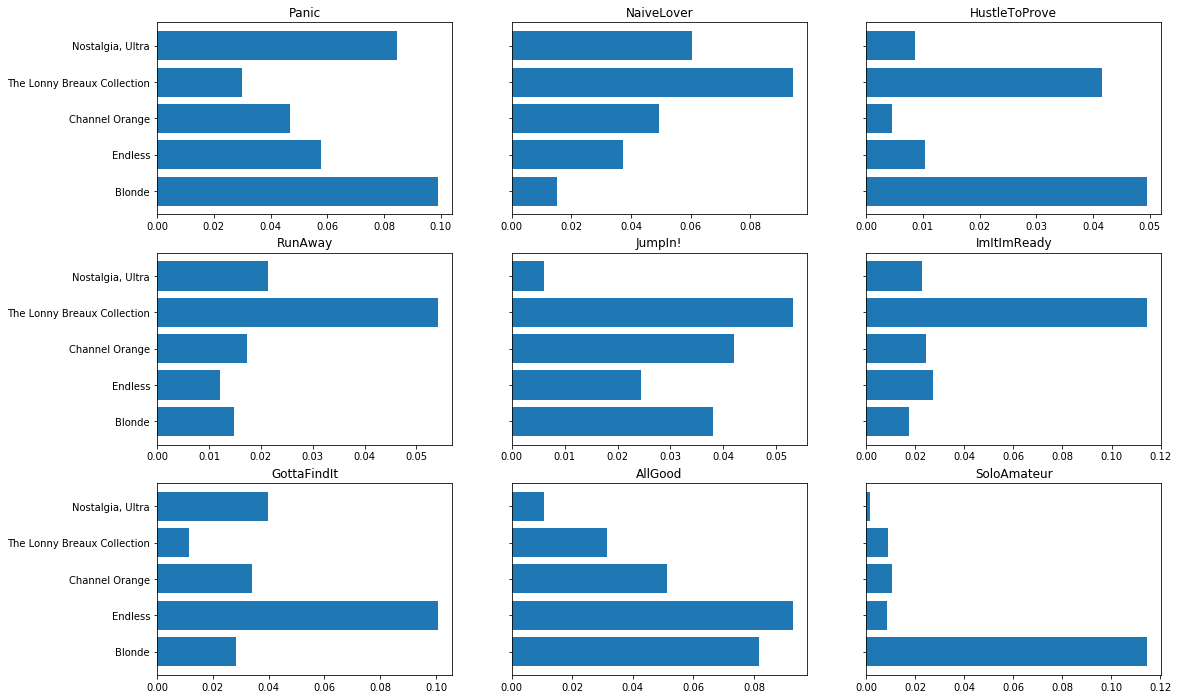

In [128]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(3, 3, figsize=(18, 12), sharey='row')

rown, coln = 0, 0

for col in new_names:
    ax[rown][coln].barh(topic_avgs['album'], topic_avgs[col])
    ax[rown][coln].invert_yaxis()
    ax[rown][coln].set_title(col)
    if coln >= 2:
        coln = 0
        rown += 1
    else:
        coln += 1

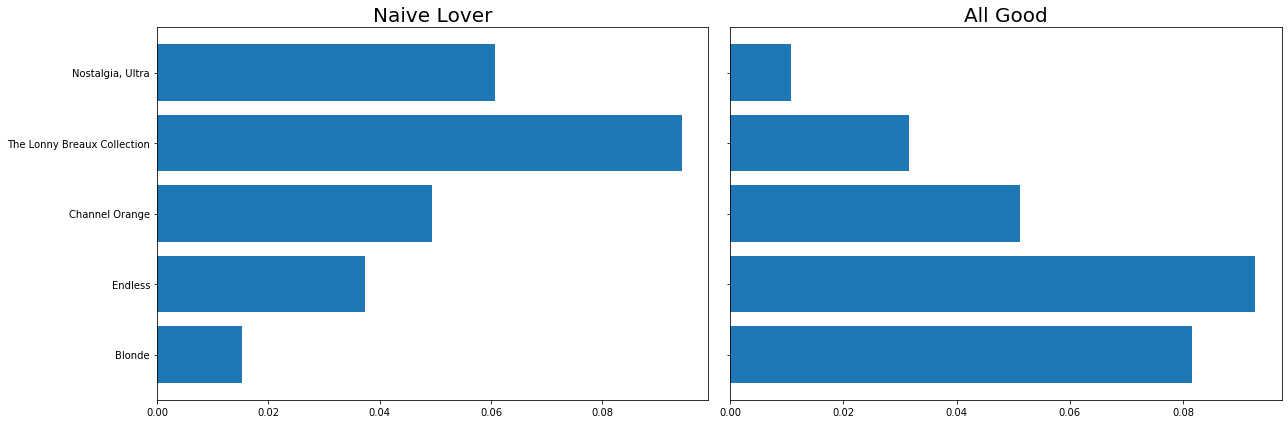

In [165]:
fig, ax = plt.subplots(1, 2, figsize=(18, 6), sharey='row', tight_layout=True)


ax[0].barh(topic_avgs['album'], topic_avgs['NaiveLover'])
ax[0].invert_yaxis()
ax[0].set_title('Naive Lover', fontsize=20)

ax[1].barh(topic_avgs['album'], topic_avgs['AllGood'])
# ax[1].invert_yaxis()
ax[1].set_title('All Good', fontsize=20);
